In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import os

In [3]:
combined = pd.read_csv('JCB_202001064_DataS1.xls')

In [4]:
combined

,Replicate,Treatment,Speed
0,1,Control,43.692020
1,1,Control,41.856640
2,1,Control,49.117070
3,1,Control,49.793310
4,1,Control,41.543010
...,...,...,...
295,3,Drug,8.518668
296,3,Drug,9.718374
297,3,Drug,10.602750
298,3,Drug,12.365170


In [3]:
def read_excel_start_with(folder_path, start): 
    """读取某文件夹中以某字符串开头的Excel表格并返回一个合并的DataFrame"""

    # 获取文件夹中所有文件的列表
    file_list = os.listdir(folder_path)

    # 以 start 开头的 Excel 文件列表
    xlsx_files = [file for file in file_list if file.startswith(start) and file.endswith(".xlsx")]

    # print(xlsx_files)
    
    # 创建一个空的 DataFrame
    combined_df = pd.DataFrame()

    # 读取每个 Excel 文件并将数据追加到 combined_df
    for file in xlsx_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df


In [4]:
df_control = read_excel_start_with("Vocalmat_dopa", "control")

In [8]:
df_dopa = read_excel_start_with("Vocalmat_dopa", "carbidopa")

In [10]:
control_value_counts = df_control["Class"].value_counts()
dopa_value_counts = df_dopa['Class'].value_counts()

control_value_counts_df = control_value_counts.to_frame(name="count")
dopa_value_counts_df = dopa_value_counts.to_frame(name="count")
print(control_value_counts_df)
print(dopa_value_counts_df)

            count
noise_dist   8831
flat          342
short         135
up_fm          90
down_fm        23
chevron        23
step_down      14
step_up         6
complex         1
            count
noise_dist   6624
flat          693
short          84
step_up        20
up_fm          12
down_fm         4
step_down       4
chevron         4


In [11]:
control_vocallist = control_value_counts_df.drop("noise_dist")
dopa_vocallist = dopa_value_counts_df.drop("noise_dist")

In [12]:
control_vocallist

,count
flat,342
short,135
up_fm,90
down_fm,23
chevron,23
step_down,14
step_up,6
complex,1


In [31]:
1/(342 + 135 + 90 + 23 + 23 + 14 + 6 + 1)

0.0015772870662460567

In [13]:
dopa_vocallist

,count
flat,693
short,84
step_up,20
up_fm,12
down_fm,4
step_down,4
chevron,4


In [38]:
4/(693 + 84 + 20 + 12 + 4 + 4 + 4)

0.0048721071863581

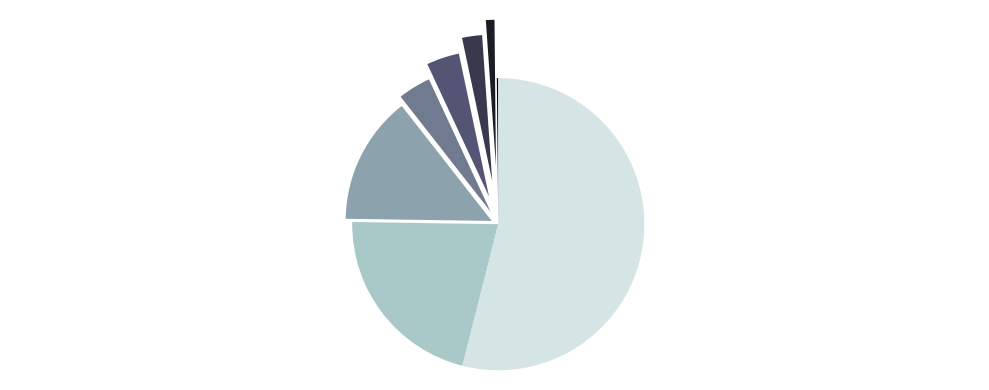

In [32]:
from matplotlib import font_manager as fm
from matplotlib import cm

labels = 'Complex', 'Step_Up', 'Step_Down', 'Chevron', 'Down_FM', 'Up_FM', 'Short', 'Flat'
sizes = [1, 6, 14, 23, 23, 90, 135, 342]
colors = cm.bone(np.arange(len(sizes)) / len(sizes))  # colormaps: Paired, autumn, rainbow, gray,spring,Darks

explode = (0, 0.4, 0.3, 0.2, 0.1, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure(figsize=(10, 4))  # 设置绘图区域大小

plt.pie(sizes, explode=explode, colors=colors,
                             shadow=False, startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.tight_layout()
# plt.legend(labels, loc='right', fontsize=18)

plt.show()

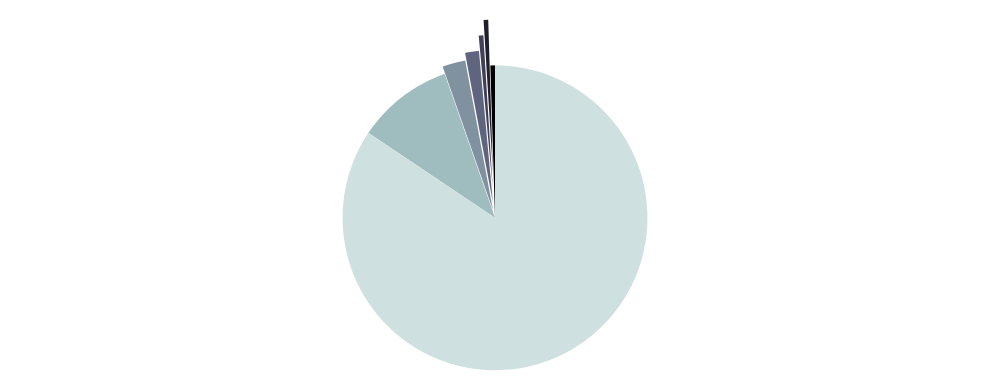

In [33]:
from matplotlib import font_manager as fm
from matplotlib import cm

labels = 'Chevron', 'Step_Down', 'Down_FM', 'Up_FM', 'Step_Up', 'Short', 'Flat'
sizes = [4, 4, 4, 12, 20, 84, 693]
colors = cm.bone(np.arange(len(sizes)) / len(sizes))  # colormaps: Paired, autumn, rainbow, gray,spring,Darks

explode = (0, 0.3, 0.2, 0.1, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure(figsize=(10, 4))  # 设置绘图区域大小

plt.pie(sizes, explode=explode, colors=colors,
                             shadow=False, startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.tight_layout()
# plt.legend(labels, loc='right', fontsize=18)

plt.show()

# --------------------------------

In [3]:
df_0725 = read_excel_start_with('VocalMat_processed', '0725')
df_0729 = read_excel_start_with('VocalMat_processed', '0729')
df_0809 = read_excel_start_with('VocalMat_processed', '0809')

In [9]:
df_0809

,Names_vocal,Start_time,End_time,Inter_vocal_interval,Inter_real_vocal_interval,Duration,min_freq_main,max_freq_main,mean_freq_main,Bandwidth,...,max_freq_total,mean_freq_total,min_intens_total,max_intens_total,corrected_max_intens_total,Background_intens,mean_intens_total,Class,Harmonic,Noisy
0,1,0.275333,0.277667,NaN,NaN,0.002333,168562.5,169687.5,169195.312500,1125.0,...,169687.5,169195.312500,-127.407606,-104.349764,22.863605,-127.213368,-109.488343,short,0,0
1,2,2.827333,2.829333,2.549667,2.549667,0.002000,96937.5,99187.5,98758.928571,2250.0,...,101062.5,99046.875000,-114.835636,-91.111758,34.468579,-125.580337,-105.093643,noise_dist,0,0
2,3,5.586333,5.588000,2.757000,2.757000,0.001667,48000.0,50250.0,49812.500000,2250.0,...,50250.0,49812.500000,-128.946498,-83.967561,41.597641,-125.565202,-105.615705,noise_dist,0,0
3,4,6.733000,6.735333,1.145000,1.145000,0.002333,47250.0,188625.0,136031.250000,141375.0,...,188625.0,108723.214286,-139.832827,-93.043192,33.769106,-126.812298,-110.881145,noise_dist,0,0
4,5,7.516333,7.526000,0.781000,0.781000,0.009667,186000.0,190125.0,188723.684211,4125.0,...,190125.0,188723.684211,-134.835021,-113.393678,24.437501,-137.831179,-120.965908,noise_dist,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,184,386.196667,386.200333,0.062667,0.062667,0.003667,98062.5,98625.0,98390.625000,562.5,...,98625.0,98390.625000,-113.469056,-100.456585,23.406916,-123.863501,-103.502469,noise_dist,0,0
13809,185,386.721000,386.730667,0.520667,0.520667,0.009667,188437.5,190875.0,189580.357143,2437.5,...,190875.0,189580.357143,-129.567412,-115.154928,22.907723,-138.062651,-120.427875,noise_dist,0,0
13810,186,388.870667,388.876667,2.140000,2.140000,0.006000,178687.5,183750.0,181734.375000,5062.5,...,183750.0,181734.375000,-128.237196,-111.346301,23.767538,-135.113839,-117.983562,noise_dist,0,0
13811,187,389.263000,389.280000,0.386333,0.386333,0.017000,185625.0,189750.0,187673.611111,4125.0,...,189750.0,187673.611111,-128.860806,-115.809247,21.740507,-137.549755,-120.680039,noise_dist,0,0


In [4]:
df_notpreg = pd.concat([df_0725, df_0809], ignore_index=True)
df_preg = df_0729

notpreg_value_counts = df_notpreg["Class"].value_counts()
preg_value_counts = df_preg['Class'].value_counts()

notpreg_value_counts_df = notpreg_value_counts.to_frame(name="count")
preg_value_counts_df = preg_value_counts.to_frame(name="count")
print(notpreg_value_counts_df)
print(preg_value_counts_df)

             count
noise_dist   30769
short          681
flat           321
up_fm          164
step_down       57
down_fm         12
chevron          7
step_up          2
rev_chevron      2
complex          2
two_steps        2
            count
noise_dist  16143
flat         2203
up_fm         532
short         375
step_up       171
step_down     123
chevron        44
down_fm        44
complex         8
two_steps       5


In [5]:
notpreg_value_counts_df = notpreg_value_counts_df.drop('noise_dist')
print(notpreg_value_counts_df)

             count
short          681
flat           321
up_fm          164
step_down       57
down_fm         12
chevron          7
step_up          2
rev_chevron      2
complex          2
two_steps        2


In [6]:
preg_value_counts_df = preg_value_counts_df.drop('noise_dist')
print(preg_value_counts_df)

           count
flat        2203
up_fm        532
short        375
step_up      171
step_down    123
chevron       44
down_fm       44
complex        8
two_steps      5


In [74]:
57/(8+7+12+57+164+321+681)

0.0456

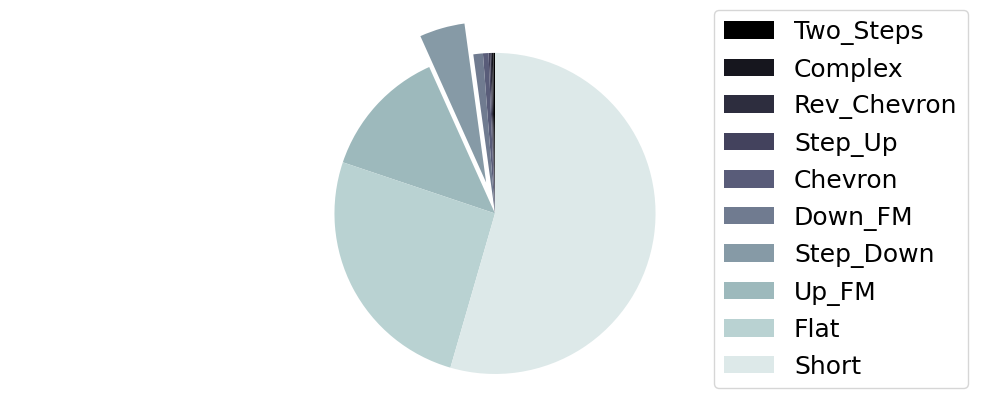

In [21]:
from matplotlib import font_manager as fm
from matplotlib import cm

labels = 'Two_Steps', 'Complex', 'Rev_Chevron', 'Step_Up', 'Chevron', 'Down_FM', 'Step_Down', 'Up_FM', 'Flat', 'Short'
sizes = [2, 2, 2, 2, 7, 12, 57, 164, 321, 681]
colors = cm.bone(np.arange(len(sizes)) / len(sizes))  # colormaps: Paired, autumn, rainbow, gray,spring,Darks

explode = (0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure(figsize=(10, 4))  # 设置绘图区域大小

plt.pie(sizes, explode=explode, colors=colors,
                             shadow=False, startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.tight_layout()
plt.legend(labels, loc='right', fontsize=18)

plt.show()

In [81]:
123/(5+8+44+44+123+171+375+532+2203)

0.035092724679029956

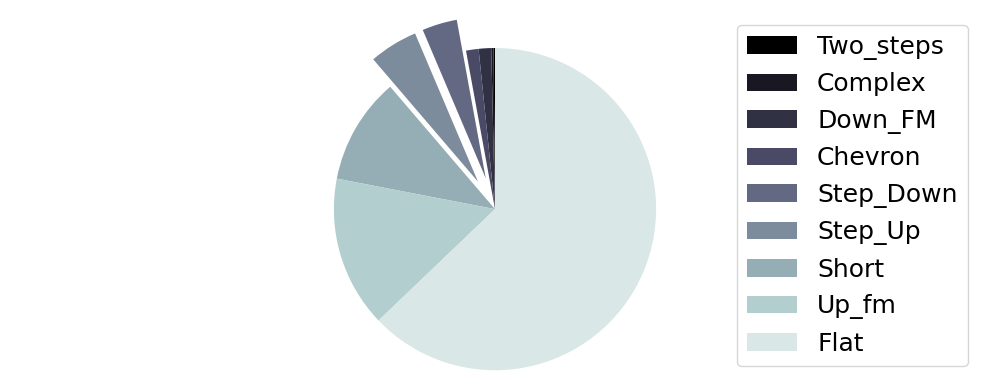

In [23]:
labels = 'Two_steps', 'Complex', 'Down_FM', 'Chevron', 'Step_Down', 'Step_Up', 'Short', 'Up_fm', 'Flat'
sizes = [5, 8, 44, 44, 123, 171, 375, 532, 2203]
colors = cm.bone(np.arange(len(sizes)) / len(sizes))  # colormaps: Paired, autumn, rainbow, gray,spring,Darks

explode = (0, 0, 0, 0, 0.2, 0.2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure(figsize=(10, 4))  # 设置绘图区域大小

plt.pie(sizes, explode=explode, colors=colors,
                             shadow=False, startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.tight_layout()
plt.legend(labels, loc='right', fontsize=18)

plt.show()

  Treatment  Replicate      Speed
0   Control          1  41.490610
1   Control          2  32.638003
2   Control          3  20.622035
3      Drug          1  29.573912
4      Drug          2  22.317653
5      Drug          3  12.898156
Treatment    Control       Drug
Replicate                      
1          41.490610  29.573912
2          32.638003  22.317653
3          20.622035  12.898156


Text(0.5, 60.22755, 'P = 0.015')

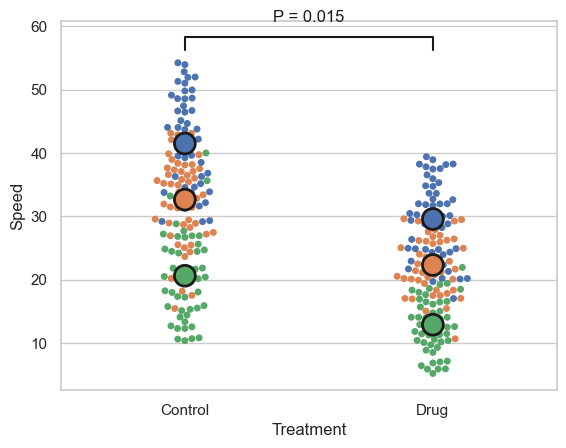

In [8]:
# sns.set(style="whitegrid")

# ReplicateAverages = combined.groupby(['Treatment','Replicate'], as_index=False).agg({'Speed':"mean"})
# print(ReplicateAverages)

# ReplicateAvePivot = ReplicateAverages.pivot_table(columns='Treatment', values='Speed', index="Replicate")
# print(ReplicateAvePivot)

# statistic, pvalue = scipy.stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug'])

# P_value = str(float(round(pvalue, 3)))

# sns.swarmplot(x="Treatment", y="Speed", hue="Replicate",data=combined)

# ax = sns.swarmplot(x="Treatment", y="Speed", hue="Replicate", size=15, edgecolor="k", linewidth=2, data=ReplicateAverages)

# ax.legend_.remove()

# x1, x2 = 0, 1

# y, h, col = combined['Speed'].max() + 2, 2, 'k'

# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col); plt.text((x1+x2)*.5, y+h*2, "P = "+P_value,ha='center', va='bottom', color=col)